In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt
import qcodes
print(qcodes.__version__)

# Import QCoDeS specific packages
import qcodes as qc

from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.sqlite.database import initialise_database
from qcodes.dataset.experiment_container import (Experiment,
                                                 load_last_experiment,
                                                 new_experiment)
from qcodes import load_by_id, load_by_run_spec
from qcodes.dataset.plotting import plot_dataset

from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id,flatten_1D_data_for_plot
from qcodes.dataset.experiment_container import load_experiment_by_name, new_experiment

from qcodes.instrument.base import Instrument
from qcodes.dataset.legacy_import import import_dat_file


from qcodes.dataset.sqlite.database import get_DB_location
from qcodes import config
import os.path
import os

0.14.0


In [4]:
#qc.config['core']['db_location'] = r"C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db"


mainpath = 'C:/Users/kjh109/Desktop/My Research in NBI/Dropbox/DATA Files/PPMS Data/DB Files' #Need to change directories
#mainpath = 'C:/Users/quantum_ppms/Desktop/Results' #Need to change directories
config.current_config.core.db_location = os.path.join(mainpath,'MQML258_BB_1BD_200618.db') #Need to change file name
Sample_name = str('MQML258BB')

newpath = os.path.join(mainpath, Sample_name) 
if not os.path.exists(newpath):
    os.makedirs(newpath)

#figurepath = newpath

initialise_database()

# Create the Dictionary
log = {}

In [5]:
for dataid in range(1,99):
    dataset = qc.load_by_id(98)
    experiment_name = dataset.exp_id
    print(dataset)

results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PP

SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dr

SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dr

SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML258_BB_1BD_200618.db
---------------------------------------------------------------------------------------------------------------------
ppms_cryostat_field_ramp - numeric
SR830_R - numeric
SR830M_X - numeric
results #98@C:\Users\kjh109\Desktop\My Research in NBI\Dr

<IPython.core.display.Javascript object>


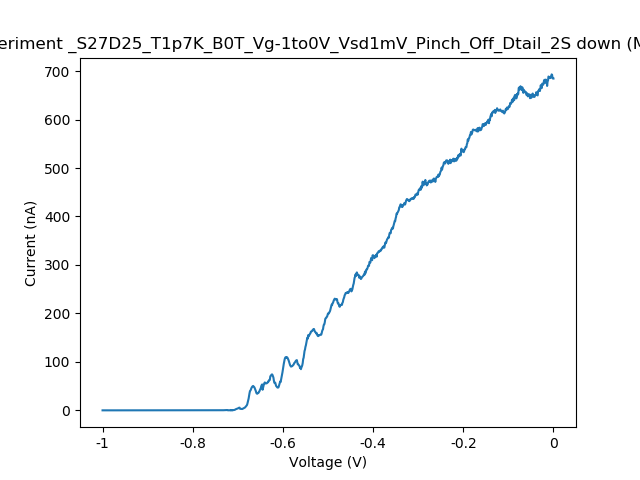

<IPython.core.display.Javascript object>


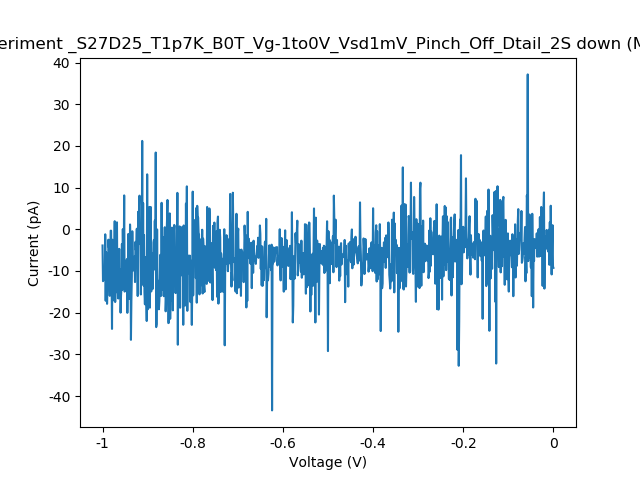

<IPython.core.display.Javascript object>


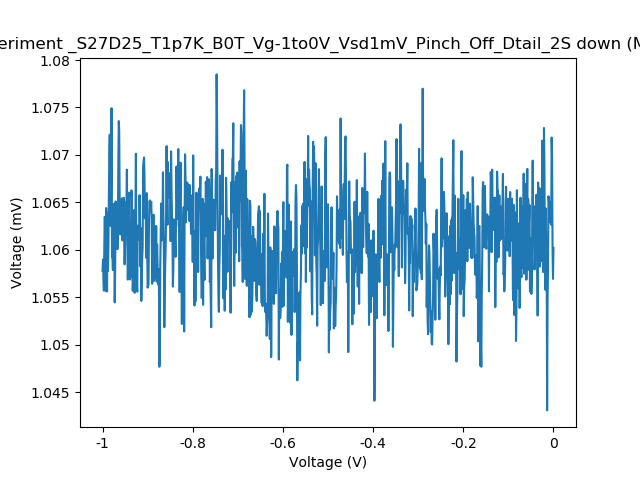

([<matplotlib.axes._subplots.AxesSubplot at 0x2012ceb94a8>,
 [None, None, None])

In [39]:
plot_by_id(69)

In [28]:
dataid = str(81)
Device_name = str('Ii2HB5')
Exp_name = str('S29D25_RH28RL27_HX28LX37_T1p7K_B-1p5to1p5T_Vg0to5V_2Dmap')

plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy2.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy2.svg')

# 3D Plot

In [75]:
df = qc.load_by_id(48).get_data_as_pandas_dataframe()['SR830_R']

xaDataSet = df.to_xarray()
xaDataArray = xaDataSet['SR830_R']
xaDataArray

<xarray.DataArray 'SR830_R' (KL_smub_volt: 21, ppms_cryostat_field_setpoint: 61)>
array([[3.49285e-04, 3.49523e-04, 3.52146e-04, ..., 3.56914e-04, 3.53279e-04,
        3.53338e-04],
       [9.73050e-05, 9.77521e-05, 9.84077e-05, ..., 1.00077e-04, 9.97190e-05,
        9.93018e-05],
       [4.85184e-05, 4.85780e-05, 4.86376e-05, ..., 4.86972e-05, 4.84886e-05,
        4.83396e-05],
       ...,
       [1.54824e-05, 1.54712e-05, 1.55122e-05, ..., 1.55160e-05, 1.55718e-05,
        1.55569e-05],
       [1.56016e-05, 1.55569e-05, 1.55532e-05, ..., 1.55942e-05, 1.55867e-05,
        1.56091e-05],
       [1.54861e-05, 1.54377e-05, 1.54265e-05, ..., 1.55010e-05, 1.55234e-05,
        1.54750e-05]])
Coordinates:
  * KL_smub_volt                  (KL_smub_volt) float64 0.0 0.25 ... 4.75 5.0
  * ppms_cryostat_field_setpoint  (ppms_cryostat_field_setpoint) float64 -1.5 ... 1.5

<IPython.core.display.Javascript object>


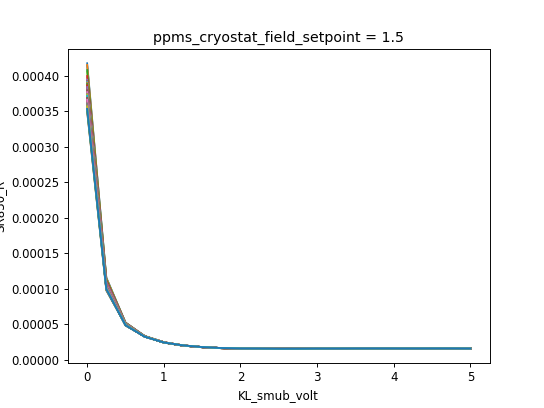

In [76]:
fig, ax = plt.subplots(1)
for i in range(0,xaDataArray.shape[1]):
    xaDataArray[:, i].plot(ax=ax)

<IPython.core.display.Javascript object>


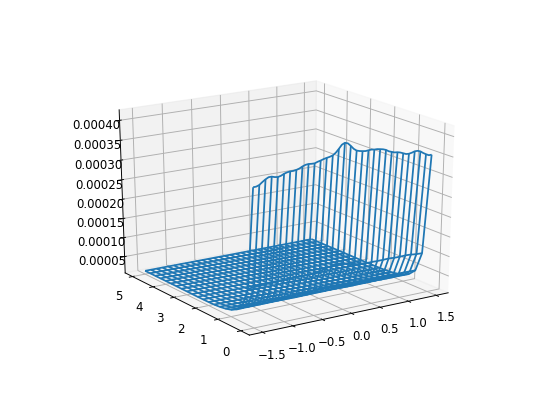

In [77]:
#xx, yy = np.meshgrid(xaDataArray.ppms_cryostat_field_setpoint.values, xaDataArray.ppms_cryostat_temperature_setpoint.values)
xx, yy = np.meshgrid(xaDataArray.ppms_cryostat_field_setpoint.values, xaDataArray.KL_smub_volt.values)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(xx, yy, xaDataArray.values)

# Extract Hall Mobility Values

In [8]:
W = 300 * 1e-9 #m
L = 2.0 * 1e-6 #m
Isd = 10 * 1e-9 #A
dB = 10 #T
Vg = 1.5 #V

Vxx = 43.262 * 1e-6 #V
Vxy = ((468.724-(-1190.68))* 1e-2) * 1e-6 #V

Rxx = Vxx / Isd #Ohm
roxx = Rxx * (W/L) #Ohm
Rxy = Vxy / Isd #Ohm

n2d = (1/(1.6e-19 * (Rxy/dB))) #1e-4 #cm-2
muH = (1/(1.6e-19 * n2d * roxx)) #1e-12 #cm2/V.s
#muH_1 = ((Vxy * L)/(dB * Vxx * W)) #1e-12 #cm2/V.s
muHm = muH * 1e4

muH3d = muHm * 11 #0.3A
#muH3d = muHm * 4 #0.5A


print ('Rxx =', Rxx, 'Ohm')
print ('roxx =', roxx, 'Ohm')
print ('Vxy =', Vxy, 'V')
print ('Rxy =', Rxy, 'Ohm')
print ('n2d =', n2d, '/m2')
print ('muH =', muHm, 'cm2/Vs')
#print ('muH_1 =', muHm, 'cm2/Vs')
print ('muH3d =', muH3d, 'cm2/Vs')

# For Vxy2=========================================

#Vxx2 = 23.4 * 1e-6 #V
#Vxy2 = 2.04 * 1e-6 #V

#Rxx2 = Vxx2 / Isd #Ohm
#roxx2 = Rxx2 * (W/L) #Ohm
#Rxy2 = Vxy2 / Isd #Ohm
#n2d2 = (1/(1.61e-19 * (Rxy2/dB))) #1e-4 #cm-2
#muH2 = (1/(1.61e-19 * n2d2 * roxx2)) #1e-12 #cm2/V.s
#muHm2 = muH2 * 1e4

#muH3d2 = muHm2 * 11 #0.3A
#muH3d2 = muHm2 * 4 #0.5A

#print ('===============================')
#print ('Rxy2 =', Rxy2, 'Ohm')
#print ('roxx2 =', roxx2, 'Ohm')
#print ('Rxy2 =', Rxy2, 'Ohm')
#print ('n2d2 =', n2d2, '/m2')
#print ('muH2 =', muHm2, 'cm2/Vs')
#print ('muH3d2 =', muH3d2, 'cm2/Vs')

#==================================================


Rxx = 4326.2 Ohm
roxx = 648.9300000000001 Ohm
Vxy = 1.659404e-05 V
Rxy = 1659.404 Ohm
n2d = 3.766412519193638e+16 /m2
muH = 2557.1386744332976 cm2/Vs
muH3d = 28128.525418766272 cm2/Vs


# Data Logging

In [229]:
log['id']    = 'MQML22Ie1HB4'

log['location']    = 'mqml' 
log['fridge']      = 'dynacoolppms'
log['lockin']      = 'sr830' # sr830
log['lockin2']      = 'sr830m' # sr830
log['sourcemeter'] = 'keithley2614bsmua'
log['multimeter']  = '' #keysight34465A
log['currentampl'] = 'physicsbaselsp983withlsk389a' # physicsbaselsp983withlsk389a
log['voltageampl'] = 'srs-sr560-lownoisepreamplifier' #srs-sr560-lownoisepreamplifier


log['voltdivac'] = 1/100*1e6
log['voltdivdc'] = 1/1
log['voltageamplgain'] = 1e2


log['timeconstant'] = 0.03   #s
log['sensitivity']  = 1      #V
log['frequency']    = 15     #HZ
log['currentamplitude'] = 1e6 #I/V 


log['loadingdate']      = '20190626'
log['operator']         = 'jordan'
log['degastime']        = 10 #hr
log['degastempereture'] = 350 #K


log['temperature'] = 1.7   #K
log['field']       = '-1.5to1.5'     #T

log['length']      = L
log['width']       = W
log['SD current']  = Isd
log['magnetic field sweep'] = dB
log['gate voltage'] = Vg

log['longitudinal voltage'] = Vxx
log['longitudinal resistance'] = Rxx
log['longitudinal resistivity'] = roxx
#log['longitudinal voltage 2'] = Vxx2
log['longitudinal voltage 2'] = ''
#log['longitudinal resistance 2'] = Rxx2
log['longitudinal resistance 2'] = ''
#log['longitudinal resistivity 2'] = roxx2
log['longitudinal resistivity 2'] = ''

log['hall voltage xy1'] = Vxy
#log['hall voltage xy2'] = Vxy2
log['hall voltage xy2'] = ''
log['hall resistance xy1'] = Rxy
#log['hall resistance xy2'] = Rxy2
log['hall resistance xy2'] = ''

log['carrier density xy1'] = n2d
#log['carrier density xy2'] = n2d2
log['carrier density xy2'] = ''
log['hall mobility xy1'] = muHm
#log['hall mobility xy2'] = muHm2
log['hall mobility xy2'] = ''
log['3D hall mobility xy1'] = muH3d
#log['3D hall mobility xy2'] = muH3d2
log['3D hall mobility xy2'] = ''
log['comments'] = 'S29D25 R:HR22LR37 X:XA37XB27'

In [230]:
log

{'id': 'MQML22Ie1HB4',
 'location': 'mqml',
 'fridge': 'dynacoolppms',
 'lockin': 'sr830',
 'lockin2': 'sr830m',
 'sourcemeter': 'keithley2614bsmua',
 'multimeter': '',
 'currentampl': 'physicsbaselsp983withlsk389a',
 'voltageampl': 'srs-sr560-lownoisepreamplifier',
 'voltdivac': 10000.0,
 'voltdivdc': 1.0,
 'voltageamplgain': 100.0,
 'timeconstant': 0.03,
 'sensitivity': 1,
 'frequency': 15,
 'currentamplitude': 1000000.0,
 'loadingdate': '20190626',
 'operator': 'jordan',
 'degastime': 10,
 'degastempereture': 350,
 'temperature': 1.7,
 'field': '-1.5to1.5',
 'length': 2e-06,
 'width': 2.5000000000000004e-07,
 'SD current': 1e-08,
 'magnetic field sweep': 3,
 'gate voltage': 5,
 'longitudinal voltage': 2.3622e-05,
 'longitudinal resistance': 2362.2,
 'longitudinal resistivity': 295.27500000000003,
 'longitudinal voltage 2': '',
 'longitudinal resistance 2': '',
 'longitudinal resistivity 2': '',
 'hall voltage xy1': 1.95503e-06,
 'hall voltage xy2': '',
 'hall resistance xy1': 195.50

In [231]:
for key in log:
    print(key)

print('============================')
    
for key in log:
    print(log[key])

id
location
fridge
lockin
lockin2
sourcemeter
multimeter
currentampl
voltageampl
voltdivac
voltdivdc
voltageamplgain
timeconstant
sensitivity
frequency
currentamplitude
loadingdate
operator
degastime
degastempereture
temperature
field
length
width
SD current
magnetic field sweep
gate voltage
longitudinal voltage
longitudinal resistance
longitudinal resistivity
longitudinal voltage 2
longitudinal resistance 2
longitudinal resistivity 2
hall voltage xy1
hall voltage xy2
hall resistance xy1
hall resistance xy2
carrier density xy1
carrier density xy2
hall mobility xy1
hall mobility xy2
3D hall mobility xy1
3D hall mobility xy2
comments
MQML22Ie1HB4
mqml
dynacoolppms
sr830
sr830m
keithley2614bsmua

physicsbaselsp983withlsk389a
srs-sr560-lownoisepreamplifier
10000.0
1.0
100.0
0.03
1
15
1000000.0
20190626
jordan
10
350
1.7
-1.5to1.5
2e-06
2.5000000000000004e-07
1e-08
3
5
2.3622e-05
2362.2
295.27500000000003



1.95503e-06

195.503

9.531076440090848e+16

2207.0160584765613

24277.176643242175

# Extract Hall Voltage & Resistance (Vg Scan)

<IPython.core.display.Javascript object>


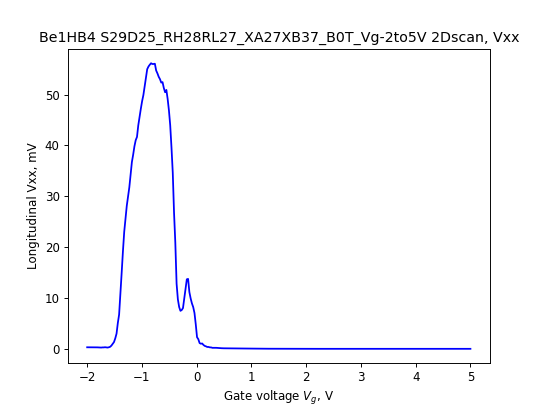

<IPython.core.display.Javascript object>


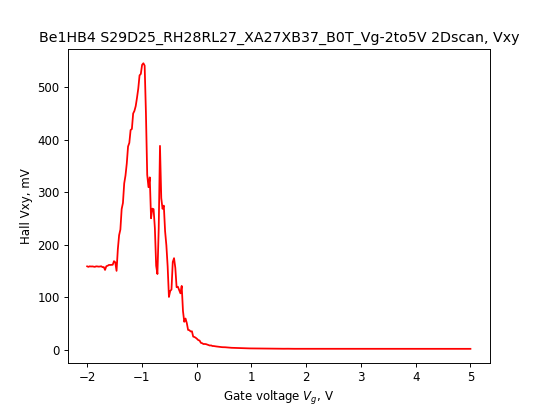

<IPython.core.display.Javascript object>


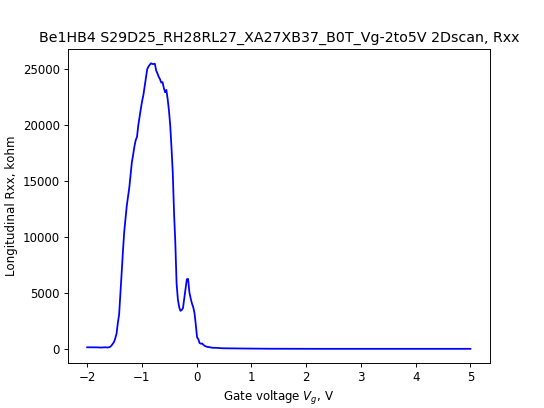

<IPython.core.display.Javascript object>


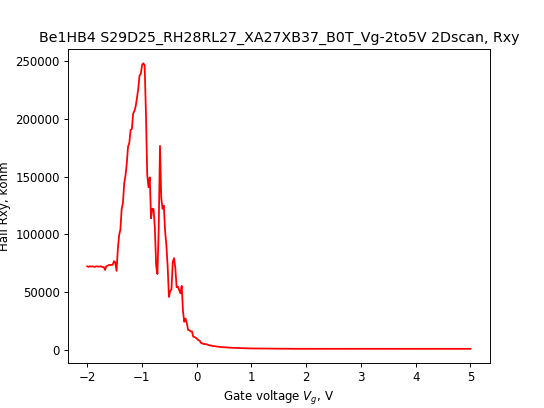

In [43]:
dataid = str(6)

Device_name = str('Be1HB4')
Exp_name = str('S29D25_RH28RL27_XA27XB37_B0T_Vg-2to5V 2Dscan')

#dividerAC = 1e-4      # the AC voltgade divider
#gain = 1e6            # gain of the current amplifier gain=V/I used 
#amplitude = 1         # V
#G0 = 7.7480917e-05    # Quntized Conductance Unit
#Offset = 1.3683663    # Off set value to fit with DC Conductance
#Offset = 1    # Off set value to fit with DC Conductance

dataset = qc.load_by_id(dataid)
labels = dataset.parameters.split(",")
v1 = flatten_1D_data_for_plot(dataset.get_data('KL_smub_volt'))
r1 = flatten_1D_data_for_plot(dataset.get_data('SR830_R'))
x1 = flatten_1D_data_for_plot(dataset.get_data('SR830M_X'))
v1_name = dataset.parameters[0]
r1_name = dataset.parameters[1]
x1_name = dataset.parameters[2]

#cond1 = ((r1/gain) / (amplitude*dividerAC) / G0) * Offset
xdataid = dataid

I = 2.2e-09 #A

fig, ax = plt.subplots(1)
pt1, = ax.plot(v1,r1*1000,'b-')
#plt.grid()

plt.xlabel(r'Gate voltage $V_g$, V')
plt.ylabel(r'Longitudinal Vxx, mV')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Vxx')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxx.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxx.svg')

fig2, ax2 = plt.subplots(1)
pt1, = ax2.plot(v1,x1*1000,'r-')
#plt.grid()

plt.xlabel(r'Gate voltage $V_g$, V')
plt.ylabel(r'Hall Vxy, mV') 
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Vxy')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy.svg')

fig3, ax3 = plt.subplots(1)
pt1, = ax3.plot(v1,(r1/I)*0.001,'b-')
#plt.grid()

plt.xlabel(r'Gate voltage $V_g$, V')
plt.ylabel(r'Longitudinal Rxx, kohm')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Rxx')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxx.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxx.svg')

fig4, ax4 = plt.subplots(1)
pt1, = ax4.plot(v1,(x1/I)*0.001,'r-')
#plt.grid()

plt.xlabel(r'Gate voltage $V_g$, V')
plt.ylabel(r'Hall Rxy, kohm') 
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Rxy')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxy.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxy.svg')

## Extract Hall Voltage & Resistance (B-field Scan)

<IPython.core.display.Javascript object>


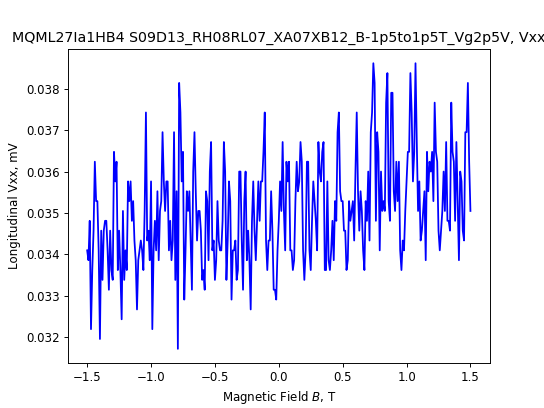

<IPython.core.display.Javascript object>


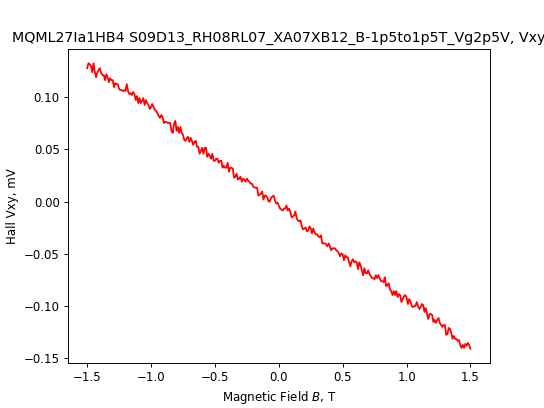

<IPython.core.display.Javascript object>


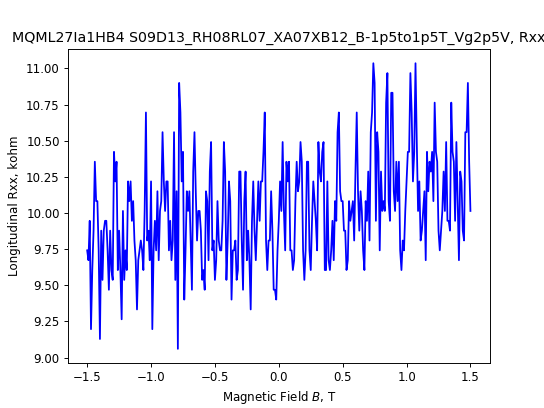

<IPython.core.display.Javascript object>


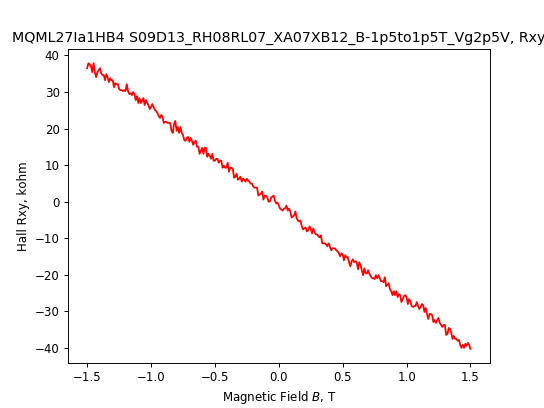

In [47]:
dataid = str(42)

Device_name = str('MQML27Ia1HB4')
Exp_name = str('S09D13_RH08RL07_XA07XB12_B-1p5to1p5T_Vg2p5V')
#Device_name = str('Be1HB4')
#Exp_name = str('S29D25_RH28RL27_XA27XB37_B-1p5to1p5T_Vg5V Scan')

#dividerAC = 1e-4      # the AC voltgade divider
#gain = 1e6            # gain of the current amplifier gain=V/I used 
#amplitude = 1         # V
#G0 = 7.7480917e-05    # Quntized Conductance Unit
#Offset = 1.3683663    # Off set value to fit with DC Conductance
#Offset = 1    # Off set value to fit with DC Conductance

dataset = qc.load_by_id(dataid)
labels = dataset.parameters.split(",")
b1 = flatten_1D_data_for_plot(dataset.get_data('ppms_cryostat_field_setpoint'))
r1 = flatten_1D_data_for_plot(dataset.get_data('SR830_R'))
x1 = flatten_1D_data_for_plot(dataset.get_data('SR830M_X'))
b1_name = dataset.parameters[0]
r1_name = dataset.parameters[1]
x1_name = dataset.parameters[2]

#cond1 = ((r1/gain) / (amplitude*dividerAC) / G0) * Offset
xdataid = dataid

I = 3.5e-09 #A

fig, ax = plt.subplots(1)
pt1, = ax.plot(b1,r1*1000,'b-')
#plt.grid()

plt.xlabel(r'Magnetic Field $B$, T')
plt.ylabel(r'Longitudinal Vxx, mV')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Vxx')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxx.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxx.svg')

fig2, ax2 = plt.subplots(1)
pt1, = ax2.plot(b1,x1*1000,'r-')
#plt.grid()

plt.xlabel(r'Magnetic Field $B$, T')
plt.ylabel(r'Hall Vxy, mV') 
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Vxy')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy.svg')

fig3, ax3 = plt.subplots(1)
pt1, = ax3.plot(b1,(r1/I)*0.001,'b-')
#plt.grid()

plt.xlabel(r'Magnetic Field $B$, T')
plt.ylabel(r'Longitudinal Rxx, kohm')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Rxx')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxx.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxx.svg')

fig4, ax4 = plt.subplots(1)
pt1, = ax4.plot(b1,(x1/I)*0.001,'r-')
#plt.grid()

plt.xlabel(r'Magnetic Field $B$, T')
plt.ylabel(r'Hall Rxy, kohm') 
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Rxy')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxy.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxy.svg')

## Extract Hall Voltage & Resistance (Temperature Scan)

<IPython.core.display.Javascript object>


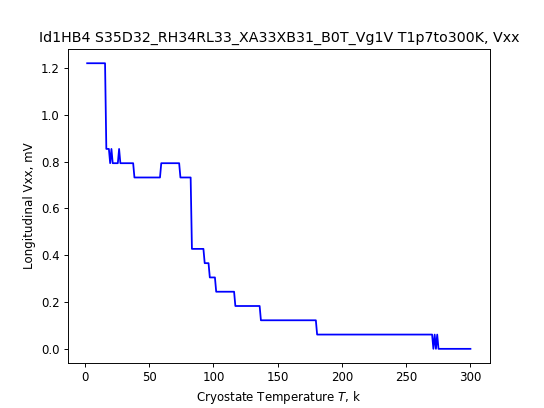

<IPython.core.display.Javascript object>


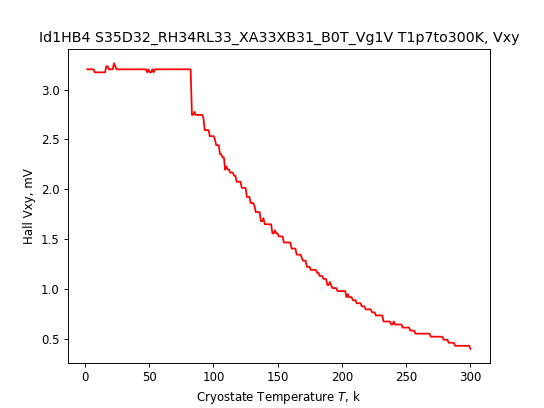

<IPython.core.display.Javascript object>


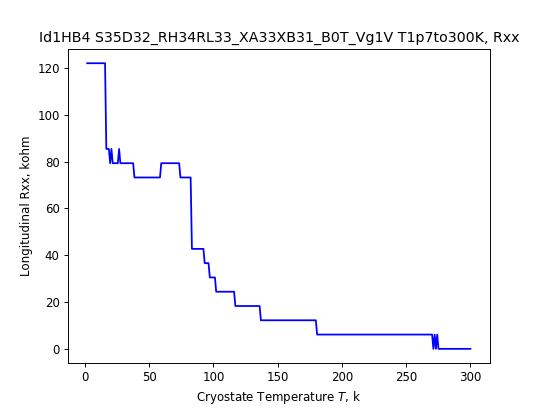

<IPython.core.display.Javascript object>


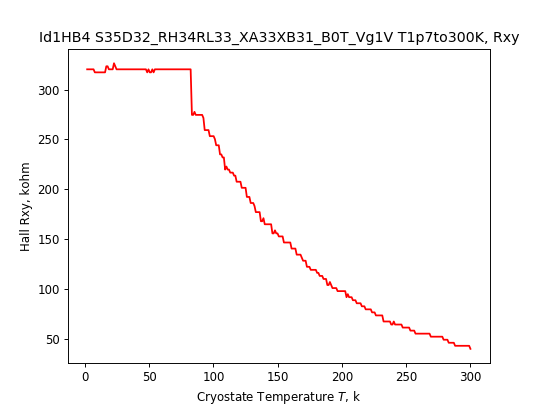

<IPython.core.display.Javascript object>


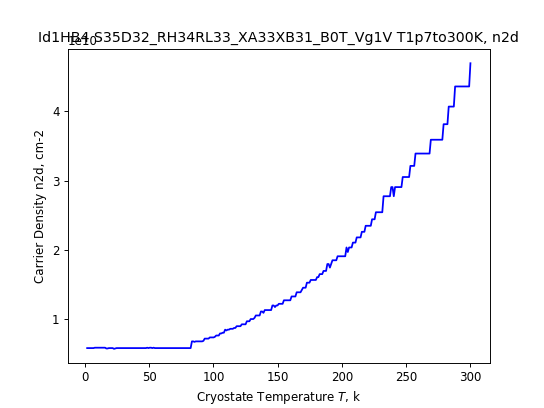

In [4]:
dataid = str(56)

Device_name = str('Id1HB4')
Exp_name = str('S35D32_RH34RL33_XA33XB31_B0T_Vg1V T1p7to300K')

#dividerAC = 1e-4      # the AC voltgade divider
#gain = 1e6            # gain of the current amplifier gain=V/I used 
#amplitude = 1         # V
#G0 = 7.7480917e-05    # Quntized Conductance Unit
#Offset = 1.3683663    # Off set value to fit with DC Conductance
#Offset = 1    # Off set value to fit with DC Conductance

dataset = qc.load_by_id(dataid)
labels = dataset.parameters.split(",")
v1 = flatten_1D_data_for_plot(dataset.get_data('ppms_cryostat_temperature_setpoint'))
r1 = flatten_1D_data_for_plot(dataset.get_data('SR830_R'))
x1 = flatten_1D_data_for_plot(dataset.get_data('SR830M_X'))
v1_name = dataset.parameters[0]
r1_name = dataset.parameters[1]
x1_name = dataset.parameters[2]

#cond1 = ((r1/gain) / (amplitude*dividerAC) / G0) * Offset
xdataid = dataid

I = 10e-09 #A

fig, ax = plt.subplots(1)
pt1, = ax.plot(v1,r1*1000,'b-')
#plt.grid()

plt.xlabel(r'Cryostate Temperature $T$, k')
plt.ylabel(r'Longitudinal Vxx, mV')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Vxx')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxx.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxx.svg')

fig2, ax2 = plt.subplots(1)
pt1, = ax2.plot(v1,x1*1000,'r-')
#plt.grid()

plt.xlabel(r'Cryostate Temperature $T$, k')
plt.ylabel(r'Hall Vxy, mV') 
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Vxy')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Vxy.svg')

fig3, ax3 = plt.subplots(1)
pt1, = ax3.plot(v1,(r1/I)*0.001,'b-')
#plt.grid()

plt.xlabel(r'Cryostate Temperature $T$, k')
plt.ylabel(r'Longitudinal Rxx, kohm')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Rxx')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxx.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxx.svg')

fig4, ax4 = plt.subplots(1)
pt1, = ax4.plot(v1,(x1/I)*0.001,'r-')
#plt.grid()

plt.xlabel(r'Cryostate Temperature $T$, k')
plt.ylabel(r'Hall Rxy, kohm') 
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', Rxy')
plt.draw()
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxy.png')
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' Rxy.svg')


fig5, ax5 = plt.subplots(1)

dB = 3 #T
Rxy = x1 / I #Ohm

n2d = (1/(1.61e-19 * (Rxy/dB))) * 1e-4 #cm-2

pt1, = ax5.plot(v1,n2d,'b-')
#plt.grid()

plt.xlabel(r'Cryostate Temperature $T$, k')
plt.ylabel(r'Carrier Density n2d, cm-2')
#sample_name = dataset.sample_name
#exper_name = dataset.exp_id
plt.title(Device_name +' '+ Exp_name +', n2d')
plt.draw()
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' n2d.png')
Bmax = 0.05 #T
n2d = 2.2 * 1e8 #/m
plt.savefig (newpath +' '+ Device_name +' '+ Exp_name +' '+ dataid +' n2d.svg')

In [4]:
Bmax = 0.00388 #T
n2d = 1.8 * 1e8 #/m

W = 240*1e-9  #nm
L = 2*1e-6  #um
R0 = 29.989  #Ohm at B=0
e = 1.6*1e-19  #electron charge
hbar = 1.054571817*1e-34  #Plank constant 
h = 6.62607004*1e-34  #Plank constant
Pi = 3.14159265359  #Pi
kf = ((2*Pi)**0.5)*n2d

Lc = 1/((e*Bmax)/(hbar*kf))
L0 = (h*L)/(e**2*kf*R0*W)

print ('Cyclotron Length = ', Lc)
print ('Mean Free Path = ', L0)


Cyclotron Length =  7.664554061562977e-05
Mean Free Path =  1.5940810071820922e-05


In [23]:
(6.66*1e16)**0.5

258069758.0112788